In [1]:
import pandas as pd

In [296]:
'''
Adwords time of click data pulled using the R script: kpo::kpo_pull_campaign_latency()
kpo::kpo_pull_campaign_latency(ks=3310, profile.id=404, date.range=c("2019-08-01","2019-10-1"), main.conv = TRUE )'''


input_file_name= '/Users/niharikab/Search Test/LaserAway/Data_latency_3319_404_aug2019.csv'
output_file_name= 'Data_latencybyconv_3319_404_aug2019.csv'

df=pd.read_csv(input_file_name)

In [297]:
df.head()

,Unnamed: 0,AccountDescriptiveName,CampaignId,CampaignName,CampaignStatus,AdNetworkType1,AdNetworkType2,ConversionLagBucket,Conversions,ConversionValue,ConversionTypeName,customer_id
0,1,LaserAway - Todd Heckmann,207673137,sd-utc-1,enabled,Search Network,Google search,<1 day,616,616,contact form 2.0,3244738290
1,2,LaserAway - Todd Heckmann,207864657,sd-hillcrest-1,enabled,Search Network,Google search,<1 day,842,842,contact form 2.0,3244738290
2,3,LaserAway - Todd Heckmann,207899097,la-shermanoaks-1,enabled,Search Network,Google search,<1 day,573,573,contact form 2.0,3244738290
3,4,LaserAway - Todd Heckmann,208005057,la-marinadelrey-1,enabled,Search Network,Google search,<1 day,841,841,contact form 2.0,3244738290
4,5,LaserAway - Todd Heckmann,208005057,la-marinadelrey-1,enabled,Search Network,Google search,<1 day,132,132,Calls from ads 15,3244738290


In [298]:
df_latency = df.groupby(['ConversionLagBucket', 'ConversionTypeName']).agg({'Conversions': 'sum'})
df_conv = df.groupby(['ConversionTypeName']).agg({'Conversions': 'sum'})


In [299]:
df_latency

Conversions
ConversionLagBucket ConversionTypeName                           
1-2 days            Calls from ads 15                           2
                    Dialogtech Calls (LASERAWAY.com)           44
                    contact form 2.0                          303
10-11 days          Dialogtech Calls (LASERAWAY.com)            4
                    contact form 2.0                           18
11-12 days          Dialogtech Calls (LASERAWAY.com)            3
                    contact form 2.0                           15
12-13 days          Dialogtech Calls (LASERAWAY.com)            6
                    contact form 2.0                           19
13-14 days          Dialogtech Calls (LASERAWAY.com)            2
                    contact form 2.0                           23
14-21 days          Dialogtech Calls (LASERAWAY.com)           22
                    contact form 2.0                          119
2-3 days            Dialogtech Calls (LASERAWAY.com)           22
                    contact form 2.0                           67
21-30 days          Calls from ads 15                           1
                    Dialogtech Calls (LASERAWAY.com)            6
                    contact form 2.0                          106
3-4 days            Dialogtech Calls (LASERAWAY.com)           19
                    contact form 2.0                           51
4-5 days            Dialogtech Calls (LASERAWAY.com)           14
                    contact form 2.0                           54
5-6 days            Dialogtech Calls (LASERAWAY.com)           13
                    contact form 2.0                           50
6-7 days            Dialogtech Calls (LASERAWAY.com)            9
                    contact form 2.0                           39
7-8 days            Dialogtech Calls (LASERAWAY.com)            4
                    contact form 2.0                           32
8-9 days            Dialogtech Calls (LASERAWAY.com)            8
                    contact form 2.0                           16
9-10 days           Dialogtech Calls (LASERAWAY.com)            4
                    contact form 2.0                           23
<1 day              Calls from ads                             28
                    Calls from ads 15                        4903
                    Dialogtech Calls (LASERAWAY.com)         4503
                    contact form 2.0                        31023

In [300]:
df_conv

,Conversions
ConversionTypeName,
Calls from ads,28
Calls from ads 15,4906
Dialogtech Calls (LASERAWAY.com),4683
contact form 2.0,31958


In [301]:
df_latency_pct= df_latency.div(df_conv, level='ConversionTypeName') * 100

In [302]:
df_latency_pct= df_latency_pct.reset_index()
df_latency_pct.loc[:, 'days_upper_limit']= df_latency_pct['ConversionLagBucket'].str.split('-',expand=True)[1].str.split(' ',expand=True)[0]

In [303]:
df_latency_pct.days_upper_limit.fillna(value=0, inplace=True)

In [304]:
df_latency_pct.days_upper_limit=df_latency_pct.days_upper_limit.astype('int')

In [316]:
df_latency_pct= df_latency_pct.sort_values(['ConversionTypeName', 'days_upper_limit', ])

In [317]:
df_latency_pct

,ConversionLagBucket,ConversionTypeName,Conversions,days_upper_limit
32,<1 day,Calls from ads,100.000000,0
33,<1 day,Calls from ads 15,99.938850,0
0,1-2 days,Calls from ads 15,0.040766,2
15,21-30 days,Calls from ads 15,0.020383,30
34,<1 day,Dialogtech Calls (LASERAWAY.com),96.156310,0
1,1-2 days,Dialogtech Calls (LASERAWAY.com),0.939569,2
13,2-3 days,Dialogtech Calls (LASERAWAY.com),0.469784,3
18,3-4 days,Dialogtech Calls (LASERAWAY.com),0.405723,4
20,4-5 days,Dialogtech Calls (LASERAWAY.com),0.298954,5
22,5-6 days,Dialogtech Calls (LASERAWAY.com),0.277600,6


In [327]:
df_latency_pct_plot= df_latency_pct[(df_latency_pct['ConversionTypeName']=='Dialogtech Calls (LASERAWAY.com)') | (df_latency_pct['ConversionTypeName']=='contact form 2.0')  ]
df_latency_pct_plot_zoom= df_latency_pct[((df_latency_pct['ConversionTypeName']=='Dialogtech Calls (LASERAWAY.com)') | (df_latency_pct['ConversionTypeName']=='contact form 2.0')) & (df_latency_pct['days_upper_limit']>0) ]


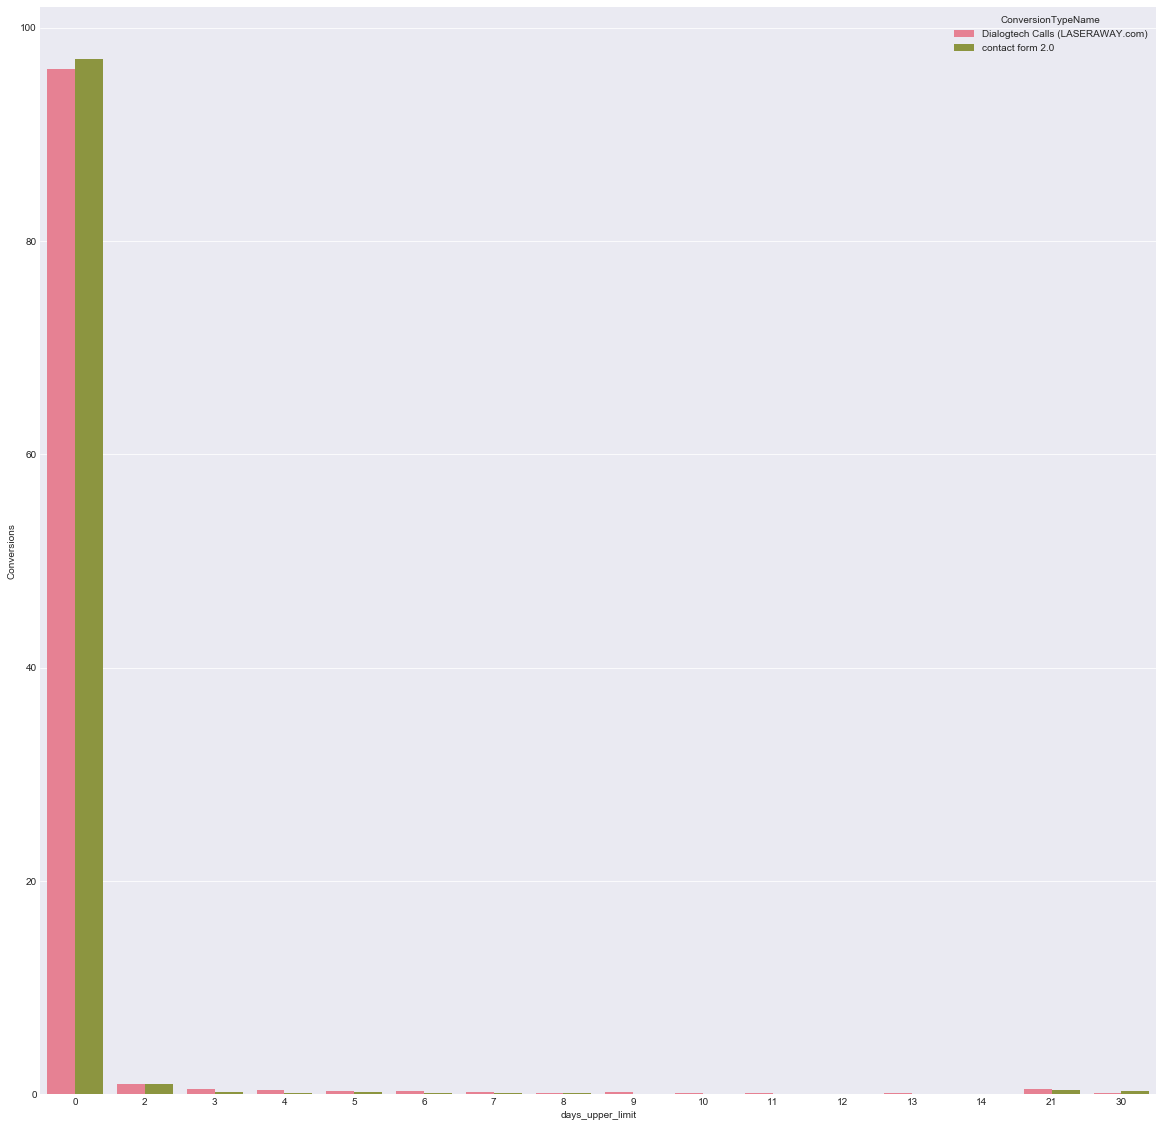

In [331]:
fig = plt.figure(figsize=(20,20))
palette = sn.color_palette("husl", len(set(df_latency_pct['ConversionTypeName'])))
sn.barplot(x='days_upper_limit', y='Conversions', data=df_latency_pct_plot, palette=palette, ci=None, hue='ConversionTypeName')
fig.savefig('full_view.png')

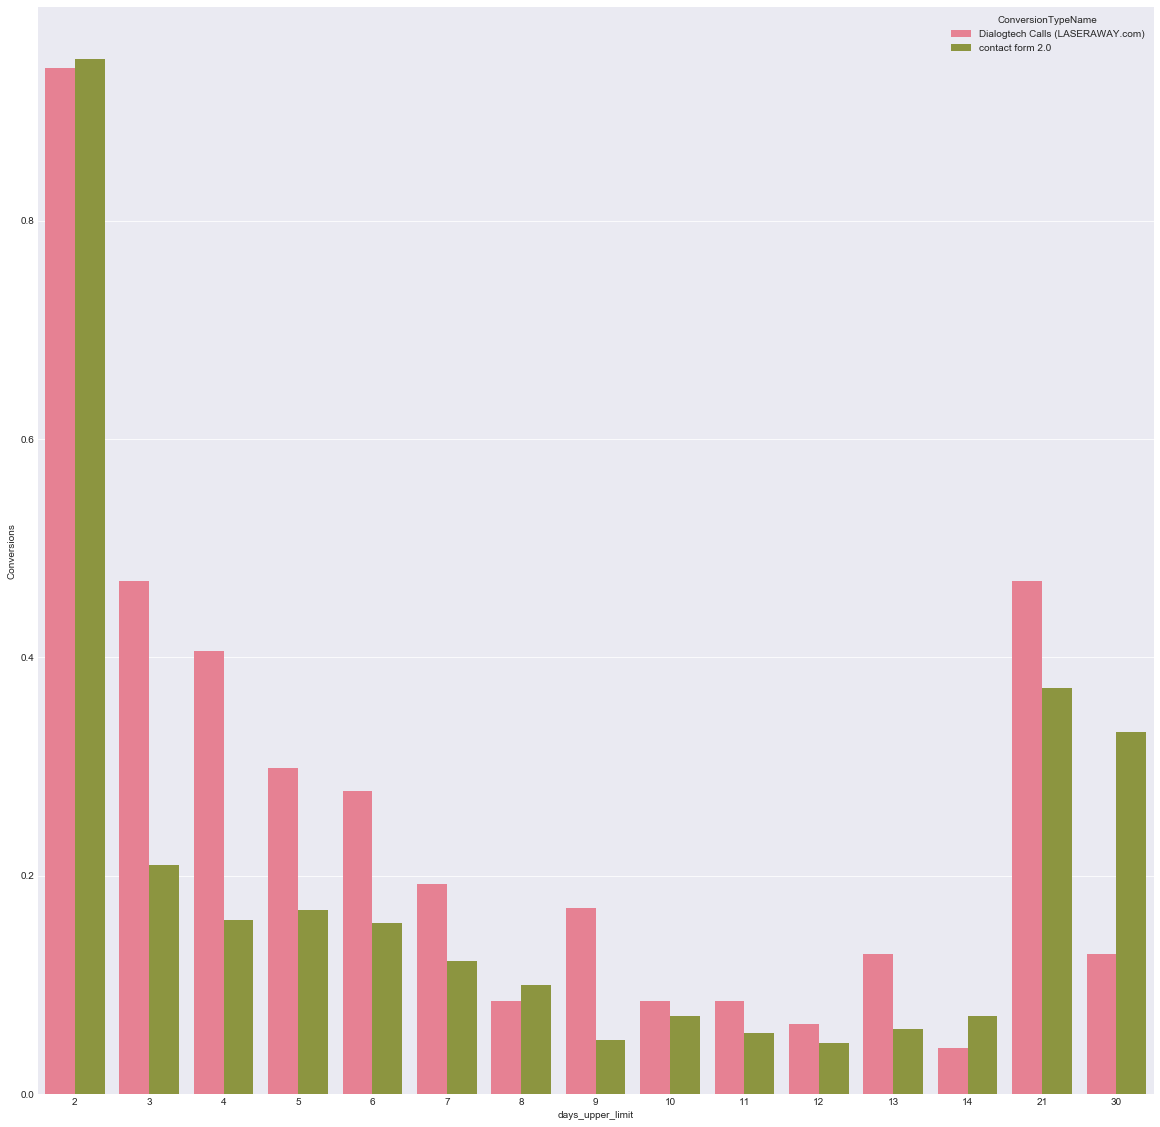

In [332]:
fig = plt.figure(figsize=(20,20))
palette = sn.color_palette("husl", len(set(df_latency_pct['ConversionTypeName'])))
sn.barplot(x='days_upper_limit', y='Conversions', data=df_latency_pct_plot_zoom, palette=palette, ci=None, hue='ConversionTypeName')
fig.savefig('Zoomed_view.png')

In [330]:
df_latency_pct.to_csv(output_file_name)